# Quantifying relationships between variables

In [ ]:
import six
from six.moves.urllib.request import urlretrieve
import landsat_sample_functions as lf

#landsat_RGBN.txt
rgb_url = "http://bit.ly/2uzjBOX"
rgbdatafile, _ = urlretrieve(rgb_url)
rgbn = lf.landsat_read(rgbdatafile)

In [ ]:
# extract colors
red = rgbn[...,0]
green = rgbn[...,1]
blue = rgbn[...,2]

#extract near infrared channel from rgb
nir = rgbn[...,3]

In [ ]:
# Let's compute vegetation! 
def NDVI(nir, red):
    return (nir-red)/(nir+red)

ndvi = NDVI(nir, red)

In [ ]:
# let's look at those components 

%matplotlib inline
import matplotlib.pyplot as plt 

fig,(ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10,30))

nim = ax1.imshow(nir)
#fraction shrinks the colorbar so that it fits nicely
fig.colorbar(nim, ax=ax1, fraction=.04)
ax1.set_title("Near Infrared")

rim = ax2.imshow(red, cmap="Reds")
fig.colorbar(rim, ax=ax2, fraction=.04)
ax2.set_title("red channel")

ndim = ax3.imshow(ndvi)
fig.colorbar(ndim, ax=ax3, fraction=.04)

fig.tight_layout()

# Review
Compute and plot the probability density estimates of:
1. near infrared data
2. red channel data
2. ndvi data

Scales are totally different, so how do we see if there's a relationship? 
Scatter plots!

Because the images are the same size, the pixels are at the same latitude and longitude and that relationship is preserved even when the data is flattened. 

In [ ]:
fig, ax = plt.subplots()

#scatter puts the nir data on the x axis, temperature on y
ax.scatter(nir.flatten(), ndvi.flatten())

ax.set(xlabel = "NIR", ylabel="NDVI")
fig.show()

In [ ]:
# Let's make those dots smaller

fig, ax = plt.subplots()

#scatter puts the nir data on the x axis, temperature on y
ax.scatter(nir.flatten(), ndvi.flatten(), s=.25)

ax.set(xlabel = "NIR", ylabel="NDVI")
fig.show()

In [27]:
# Can we fit a line?

import scipy.stats as st

x = nir.flatten()
y = ndvi.flatten()
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

NameError: name 'nir' is not defined

In [ ]:
# how do we plot that? Equation of line: y = m*x + b 
# let's compute theoretical line
# we sort x since y is a line 
possible_y = slope*sorted(x) + intercept

In [ ]:
fig, ax = plt.subplots()


ax.scatter(x, y, s=.25)

ax.plot(sorted(x), possible_y, color="black")

ax.set(xlabel = "NIR", ylabel="NDVI")
fig.show()

In [ ]:
# Is it meaningful? 
# r_value = Pearson's r correlation coefficient 
# p_value = likelihood null hypothesis is true
# std_error = avg distance between predicted and actual value
r_value, p_value, std_err

# To do

Pick either the green or blue channel and see if it's correlated with 
NDVI. Draw a scatter plot with a best fit line.

# Let's add in temperature

In [ ]:
#landsat_thermrad.txt
radiance_url = "http://tinyurl.com/ya5bz7ue"
raddatafile, _ = urlretrieve(radiance_url)
thermrad = lf.landsat_read(raddatafile)

In [ ]:
# convert thermal radiance to temperature
temps = lf.BT(thermrad,10.9,1)

# To do
1. Plot the temperature data
2. Compute the probability density of the temperature values
3. Plot the temperature against the NDVI, compute the best fit line, and see if there's a correlation

# Is there another way to see vegetation?

In [1]:
#Global Agriculture: % of land cover (land_cover.csv)
url = "http://tinyurl.com/y8bajr5f"

In [6]:
#let's use pandas to open the file
import pandas as pd
df = pd.read_csv(url, index_col=0, parse_dates=True)

In [7]:
df

,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1961-01-01,11.111111,55.319149,57.745918,45.857063,44.963504,30.944292,2.488038,50.363395,NaN,15.00,...,19.330855,8.613618,60.797342,35.894050,19.787986,44.201375,83.534610,11.049602,25.971563,28.396019
1962-01-01,11.111111,55.319149,57.837821,45.881126,44.963504,30.944146,2.488038,49.853655,NaN,15.00,...,19.346216,8.613618,60.797342,35.987346,20.141343,44.222210,82.545401,11.058424,26.042858,28.615743
1963-01-01,11.111111,55.319149,57.914407,45.897169,45.000000,30.967487,2.488038,49.283989,NaN,15.00,...,19.361578,8.613618,60.797342,36.104794,20.141343,44.244938,81.605652,11.071657,26.102046,28.835466
1964-01-01,11.111111,55.319149,58.010906,45.921232,44.890511,30.976955,2.488038,48.707380,NaN,15.00,...,19.376939,8.613618,60.631229,36.207982,20.141343,44.263879,80.579347,11.084890,26.176031,29.055189
1965-01-01,11.111111,55.319149,58.013969,45.937274,45.145985,31.000370,2.500000,48.153061,NaN,15.00,...,19.392301,9.269893,60.631229,36.320064,21.908127,44.282819,79.639598,11.093712,26.248672,29.223213
1966-01-01,11.111111,55.319149,58.072175,45.961338,45.255474,31.006902,2.511962,47.849044,NaN,15.00,...,19.407662,9.269893,60.797342,36.410420,21.908127,44.303654,79.503582,11.102534,26.375119,29.494636
1967-01-01,11.111111,55.319149,58.173268,45.985401,45.401460,31.058209,2.511962,47.394115,NaN,15.00,...,19.484470,9.269893,60.963455,36.525411,21.908127,44.316912,79.285131,11.115767,26.447760,29.714360
1968-01-01,11.111111,55.319149,58.174800,46.009465,45.255474,31.087128,2.511962,47.223105,NaN,15.00,...,19.561277,9.269893,60.963455,36.615504,22.261484,44.326382,79.128507,11.137822,26.547304,29.934083
1969-01-01,11.111111,55.319149,58.199308,46.041550,45.072993,31.142545,2.511962,47.247587,NaN,15.00,...,19.607361,9.269893,60.963455,36.844778,22.261484,44.345323,78.963638,11.159877,26.640122,30.153806
1970-01-01,11.111111,55.319149,58.214625,46.041550,44.890511,31.205082,2.535885,47.239549,NaN,15.00,...,19.714891,9.844135,61.129568,36.892058,22.438163,44.354793,78.798770,11.181932,26.734285,30.373530


In [8]:
# let's only see the first few
df.head(5)

,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1961-01-01,11.111111,55.319149,57.745918,45.857063,44.963504,30.944292,2.488038,50.363395,NaN,15.0,...,19.330855,8.613618,60.797342,35.894050,19.787986,44.201375,83.534610,11.049602,25.971563,28.396019
1962-01-01,11.111111,55.319149,57.837821,45.881126,44.963504,30.944146,2.488038,49.853655,NaN,15.0,...,19.346216,8.613618,60.797342,35.987346,20.141343,44.222210,82.545401,11.058424,26.042858,28.615743
1963-01-01,11.111111,55.319149,57.914407,45.897169,45.000000,30.967487,2.488038,49.283989,NaN,15.0,...,19.361578,8.613618,60.797342,36.104794,20.141343,44.244938,81.605652,11.071657,26.102046,28.835466
1964-01-01,11.111111,55.319149,58.010906,45.921232,44.890511,30.976955,2.488038,48.707380,NaN,15.0,...,19.376939,8.613618,60.631229,36.207982,20.141343,44.263879,80.579347,11.084890,26.176031,29.055189
1965-01-01,11.111111,55.319149,58.013969,45.937274,45.145985,31.000370,2.500000,48.153061,NaN,15.0,...,19.392301,9.269893,60.631229,36.320064,21.908127,44.282819,79.639598,11.093712,26.248672,29.223213


In [9]:
# columns? 
df.columns

Index([u'Aruba', u'Andorra', u'Afghanistan', u'Angola', u'Albania',
       u'Arab World', u'United Arab Emirates', u'Argentina', u'Armenia',
       u'American Samoa',
       ...
       u'Vietnam', u'Vanuatu', u'West Bank and Gaza', u'World', u'Samoa',
       u'Yemen, Rep.', u'South Africa', u'Congo, Dem. Rep.', u'Zambia',
       u'Zimbabwe'],
      dtype='object', length=240)

In [10]:
# Why is this useful
df.describe()

,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,21.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.111111e+01,45.838789,58.125904,46.125525,42.036707,34.939842,3.841392,48.108116,51.523516,17.941346,...,23.715500,11.997539,60.111807,37.609507,20.401604,44.532651,79.373970,11.302523,28.291729,34.518647
std,5.381063e-15,5.886009,0.168447,0.274501,1.840675,3.888173,1.578069,2.181112,7.611101,4.149707,...,5.255589,2.296383,4.809401,0.798389,4.683075,0.213696,1.396950,0.120302,1.863637,4.571576
min,1.111111e+01,39.787234,57.745918,45.857063,39.233577,30.944146,2.488038,46.545279,41.095890,15.000000,...,19.330855,8.613618,41.262458,35.894050,12.332155,44.201375,77.515271,11.049602,25.971563,28.396019
25%,1.111111e+01,40.425532,58.013203,46.041550,40.757299,31.436036,2.556818,46.849570,46.469968,15.000000,...,19.972196,9.844135,60.797342,37.317443,17.703180,44.407353,78.119719,11.264639,26.724869,31.016544
50%,1.111111e+01,42.659574,58.149235,46.041550,41.131387,33.229353,2.846890,47.020306,48.841292,15.000000,...,21.057483,11.648893,61.295681,37.731634,20.141343,44.448548,79.431452,11.314263,27.425712,32.964974
75%,1.111111e+01,51.063830,58.278957,46.121761,43.834854,39.563844,4.752392,48.291641,60.063202,22.750000,...,26.441905,14.232978,62.167774,37.927905,23.321555,44.704718,80.407884,11.380428,30.170234,38.503296
max,1.111111e+01,55.319149,58.288148,47.477340,45.401460,40.161463,6.830144,54.368964,61.671348,25.000000,...,34.966298,15.340443,63.621262,39.402686,27.703180,44.993087,83.534610,11.473060,32.063923,42.522942


In [11]:
# What if we just want the US, Canada and Mexico?
df[["United States", "Canada", "Mexico"]].describe()

,United States,Canada,Mexico
count,52.000000,52.000000,52.000000
mean,46.435366,7.440888,52.246774
std,1.091923,0.187724,1.827679
min,44.664743,6.883701,49.866509
25%,45.273862,7.403192,50.409347
50%,46.681665,7.456417,52.424702
75%,47.101308,7.536226,53.994573
max,48.860242,7.748823,54.890815


# To do
Get the stats for any other 2 countries

In [12]:
# How about the whole data set, for one country?
df["United States"]

1961-01-01    48.860242
1962-01-01    48.476137
1963-01-01    48.197940
1964-01-01    47.932516
1965-01-01    47.589792
1966-01-01    47.554526
1967-01-01    47.527994
1968-01-01    47.581276
1969-01-01    47.543280
1970-01-01    47.428966
1971-01-01    47.308865
1972-01-01    47.199682
1973-01-01    47.079581
1974-01-01    46.965813
1975-01-01    46.965813
1976-01-01    46.965813
1977-01-01    46.984701
1978-01-01    46.747993
1979-01-01    46.747993
1980-01-01    46.747993
1981-01-01    46.747993
1982-01-01    47.101308
1983-01-01    47.101308
1984-01-01    47.101308
1985-01-01    47.101308
1986-01-01    47.101308
1987-01-01    46.615336
1988-01-01    46.615336
1989-01-01    46.615336
1990-01-01    46.615336
1991-01-01    46.615336
1992-01-01    46.449488
1993-01-01    46.178605
1994-01-01    45.981094
1995-01-01    45.871911
1996-01-01    45.453414
1997-01-01    45.298265
1998-01-01    45.265838
1999-01-01    45.189301
2000-01-01    45.230585
2001-01-01    45.290070
2002-01-01    45

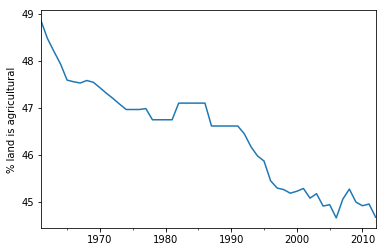

In [16]:
# plot that over time?
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df["United States"].plot(ax=ax)
ax.set(ylabel="% land is agricultural")

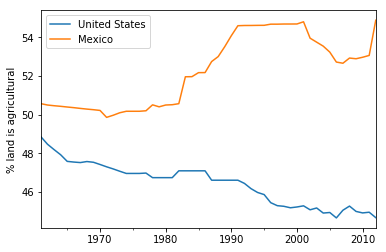

In [20]:
# more countries?
fig, ax = plt.subplots()
df[["United States", "Mexico"]].plot(ax=ax)
ax.set(ylabel="% land is agricultural")

# To do
Add another 2 countries to the above plot


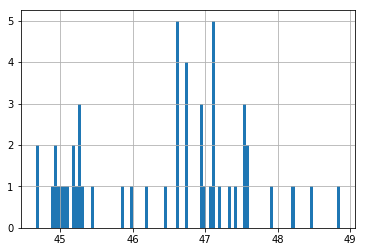

In [22]:
# What about histograms...
df["United States"].hist(bins=100)

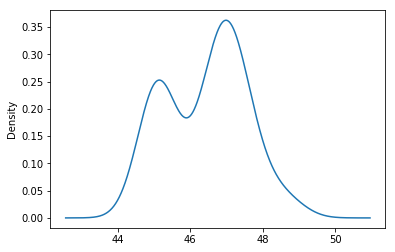

In [38]:
# And densities?
df["United States"].plot.density()

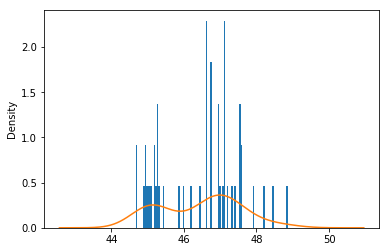

In [39]:
# both?
fig, ax = plt.subplots()
df["United States"].hist(bins=100, normed=True, ax=ax)
df["United States"].plot.density()

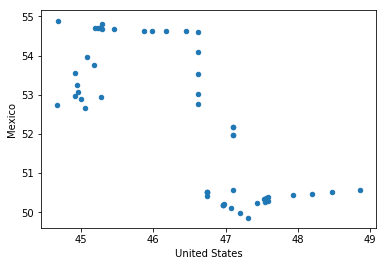

In [25]:
# scatters?
df.plot.scatter("United States", "Mexico")

In [34]:
# First compute the best fit line

slope, intercept, r_value, p_value, std_err = st.linregress(
                                            df["United States"],
                                            df["Mexico"])
predicted_y = slope*df["United States"].sort_values() + intercept

[<matplotlib.text.Text at 0x1198d1790>, <matplotlib.text.Text at 0x11a579b90>]

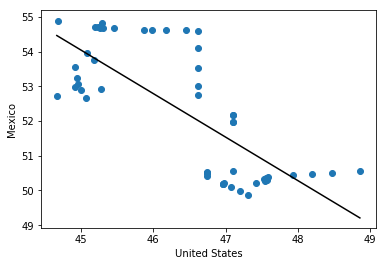

In [35]:
fig, ax = plt.subplots()

ax.scatter(df["United States"], df["Mexico"])

ax.plot(df["United States"].sort_values(), predicted_y, color="black")

ax.set(xlabel="United States", ylabel="Mexico")

In [36]:
r_value, p_value, std_err

(-0.74816587530399192, 1.8296581458566248e-10, 0.15706212127710353)

# To Do
Repeat with two different countries

In [40]:
# Can this be automated kinda too?
df[["United States", "Canada", "Mexico"]].corr()

,United States,Canada,Mexico
United States,1.000000,0.692775,-0.748166
Canada,0.692775,1.000000,-0.374270
Mexico,-0.748166,-0.374270,1.000000


# To do
Choose 5 countries and find out how they correlate to each other.

In [45]:
# What if I want all the countries but just a year?
# data frames are usually indexed via column then row
# loc uses numpy/python row then column slicing
df.loc['2012-01-01']

Aruba                             11.111111
Andorra                           42.978723
Afghanistan                       58.067580
Angola                            47.477340
Albania                           43.843066
Arab World                        38.312828
United Arab Emirates               4.748804
Argentina                         54.368964
Armenia                           59.114858
American Samoa                    24.500000
Antigua and Barbuda               20.454545
Australia                         52.780287
Austria                           38.345326
Azerbaijan                        57.687096
Burundi                           75.272586
Belgium                           44.022457
Benin                             32.813054
Burkina Faso                      44.115497
Bangladesh                        70.100638
Bulgaria                          47.190494
Bahrain                           11.315789
Bahamas, The                       1.398601
Bosnia and Herzegovina          

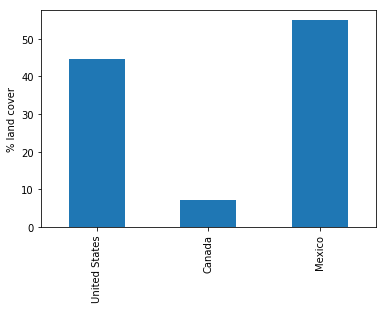

In [52]:
# visualize that?
fig, ax = plt.subplots()
df[["United States", "Canada", "Mexico"]].loc['2012-01-01'].plot.bar(ax=ax)
ax.set(ylabel="% land cover")
fig.show()

# To do:
* Plot the graph for the first year in the dataset
* Plot the graph for any other year
* Choose any other 4 countries and plot the bar graph for them

In [57]:
# can we do table?
table = df[["United States", "Canada", "Mexico"]].loc['2000':'2012']
table

,United States,Canada,Mexico
2000-01-01,45.230585,7.435303,54.697909
2001-01-01,45.290070,7.423096,54.811081
2002-01-01,45.084873,7.424746,53.962293
2003-01-01,45.178849,7.426725,53.756527
2004-01-01,44.916459,7.428485,53.550760
2005-01-01,44.945164,7.430464,53.242110
2006-01-01,44.664743,7.252865,52.727694
2007-01-01,45.062345,7.179010,52.666478
2008-01-01,45.276537,7.105155,52.934489
2009-01-01,45.000623,7.031410,52.898994


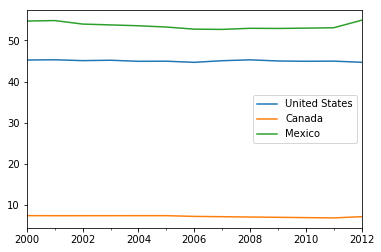

In [59]:
table.plot()